# Audio Processing

## Table of Contents
[1. Library Imports and Files](#Library-Imports-and-Files)  
[2. Knocking Audio Signal](#Knocking-Audio-Signal)  
[3. Speech Audio Signal](#Speech-Audio-Signal)

## Library Imports and Files

Library imports.

Scipy is used to open a wav file as a numpy array.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import numpy as np

import scipy.io.wavfile

In [2]:
KNOCKING = "../AudioFiles/knocking.wav"
SPEECH = "../AudioFiles/speech.wav"

A quick check on the data on the audio file to check that it seems in order.

The rate shouldbe 48,000 samples per second and the audio file should be about 6 seconds long. Having checked, everything seems to be in order.

## Knocking Audio Signal

Below, I have just plotted a real time graph of the audio signal of a knocking sound on wood.

In [3]:
rate, data = scipy.io.wavfile.read(KNOCKING)

print(rate)
print(len(data))
print(len(data)/rate)

48000
306000
6.375


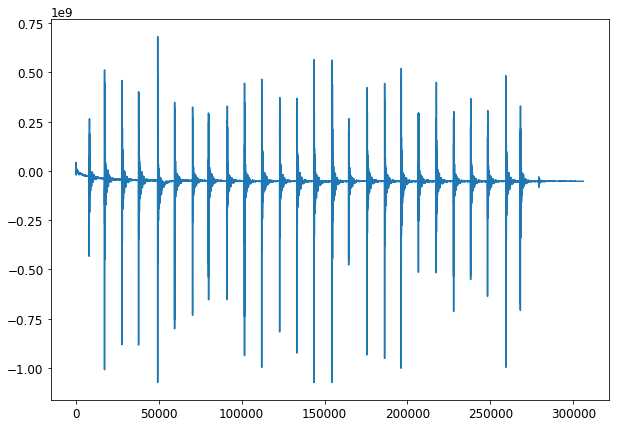

In [4]:
x = np.arange(0, len(data))
y = data

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.show()

And here, I apply a fft to the first 8192 samples of the audio file.

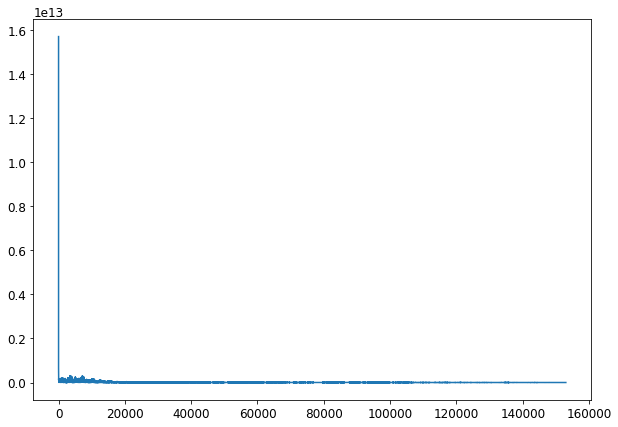

In [5]:
yFreq = np.fft.fft(data)

d = int(len(yFreq)/2)

plt.figure(figsize=(10,7))
plt.plot(abs(yFreq[:d]))
plt.show()

Start: 0	End: 8192


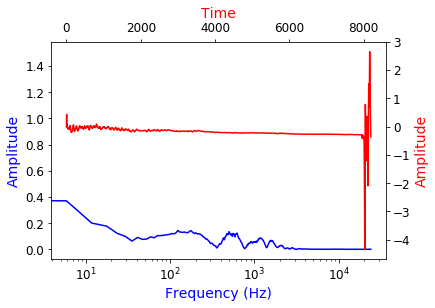

Start: 8192	End: 16384


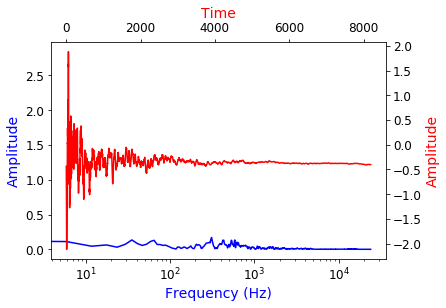

Start: 16384	End: 24576


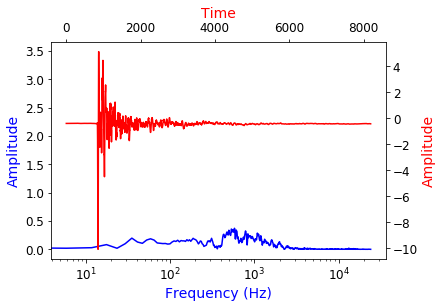

Start: 24576	End: 32768


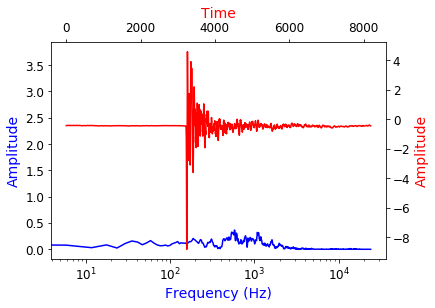

Start: 32768	End: 40960


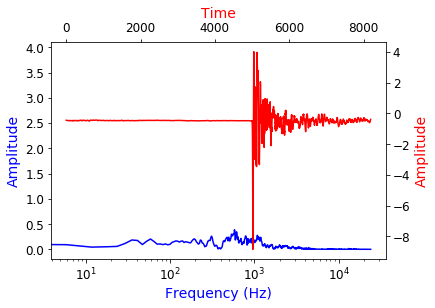

Start: 40960	End: 49152


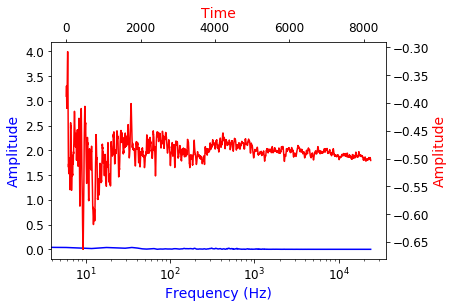

Start: 49152	End: 57344


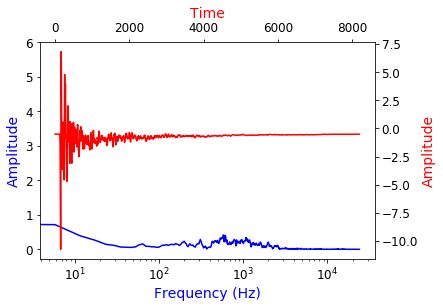

Start: 57344	End: 65536


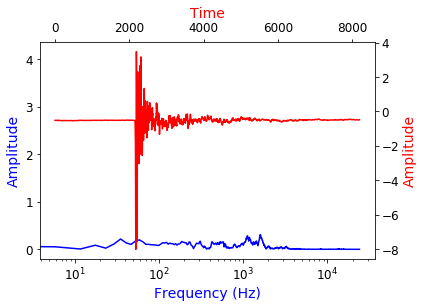

Start: 65536	End: 73728


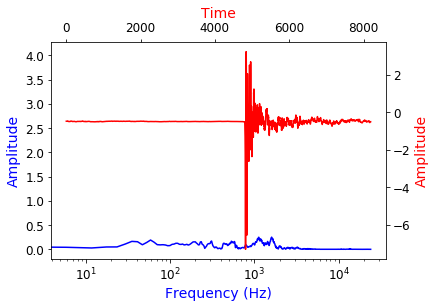

Start: 73728	End: 81920


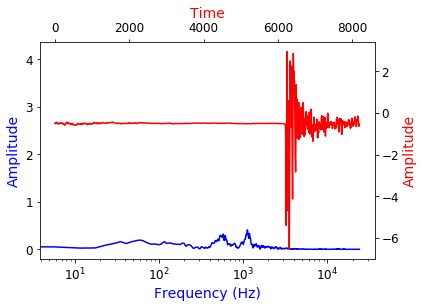

Start: 81920	End: 90112


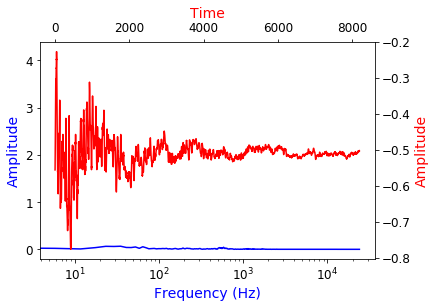

Start: 90112	End: 98304


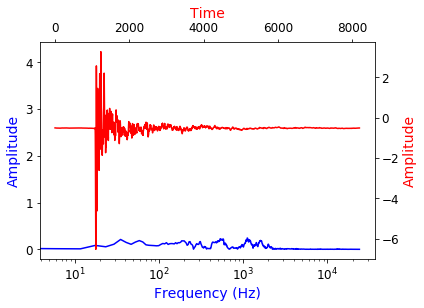

Start: 98304	End: 106496


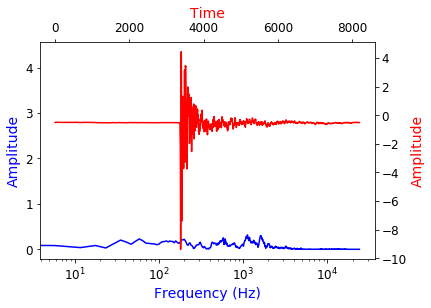

Start: 106496	End: 114688


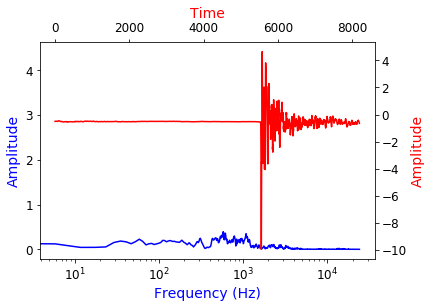

Start: 114688	End: 122880


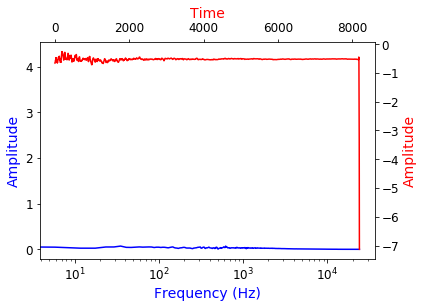

Start: 122880	End: 131072


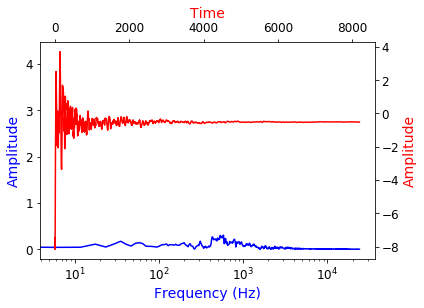

Start: 131072	End: 139264


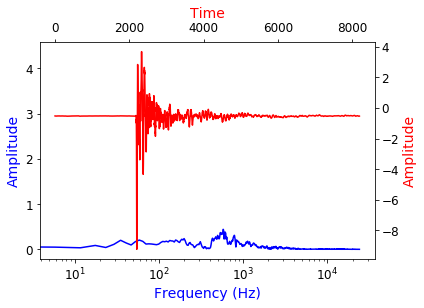

Start: 139264	End: 147456


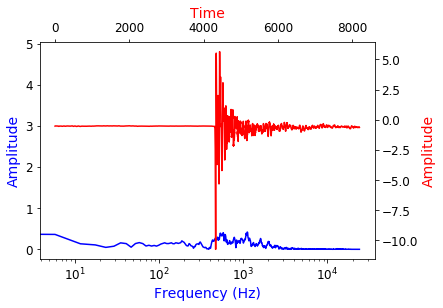

Start: 147456	End: 155648


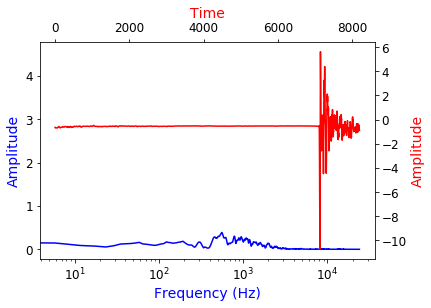

Start: 155648	End: 163840


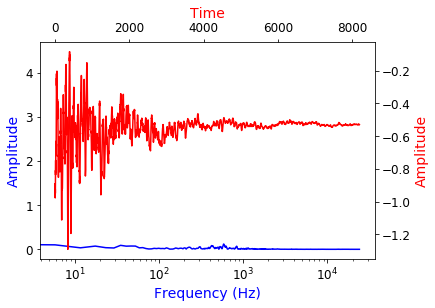

Start: 163840	End: 172032


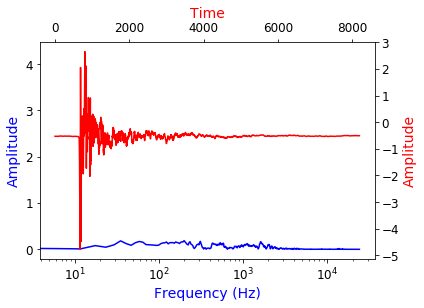

Start: 172032	End: 180224


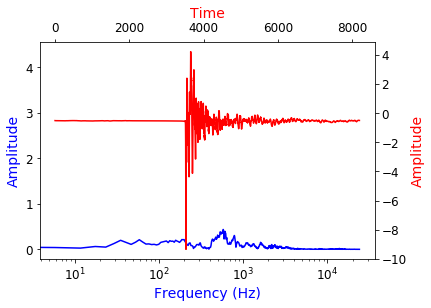

Start: 180224	End: 188416


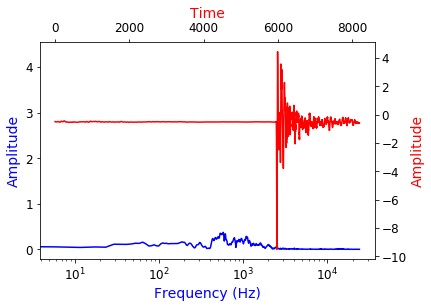

Start: 188416	End: 196608


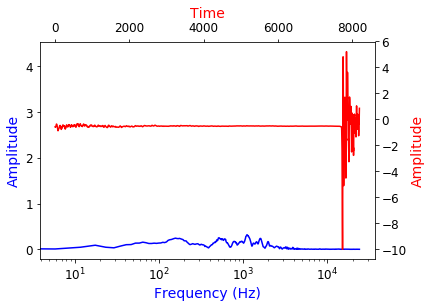

Start: 196608	End: 204800


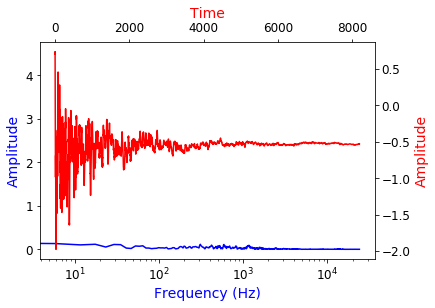

Start: 204800	End: 212992


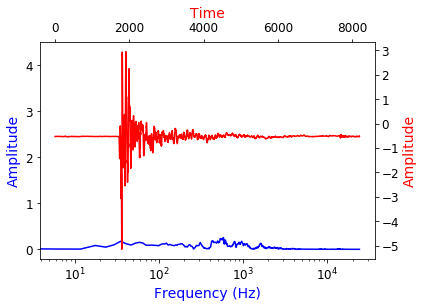

Start: 212992	End: 221184


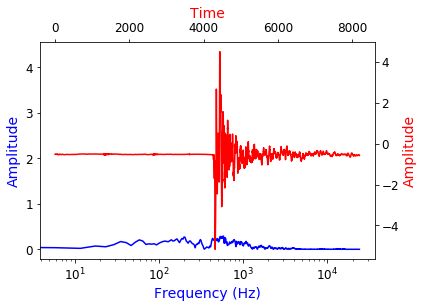

Start: 221184	End: 229376


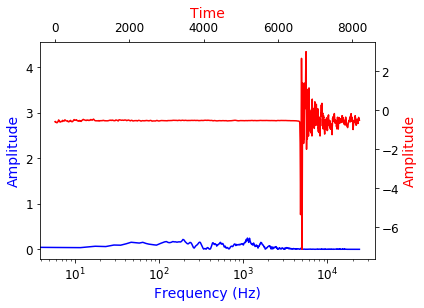

Start: 229376	End: 237568


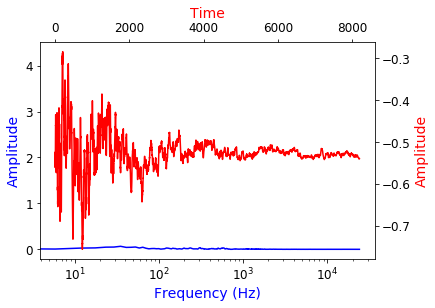

Start: 237568	End: 245760


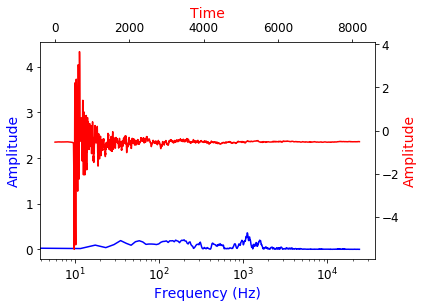

Start: 245760	End: 253952


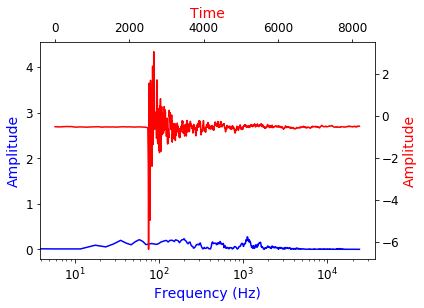

Start: 253952	End: 262144


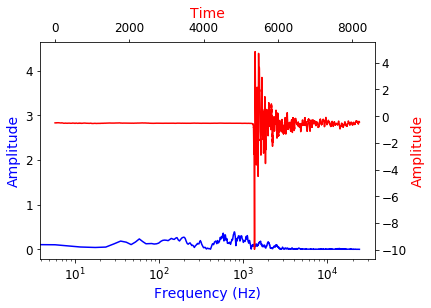

Start: 262144	End: 270336


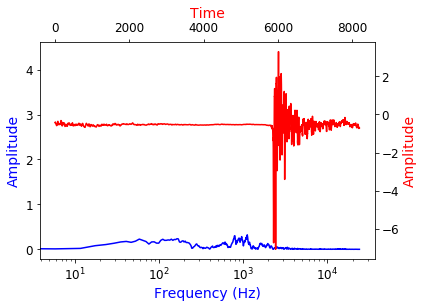

Start: 270336	End: 278528


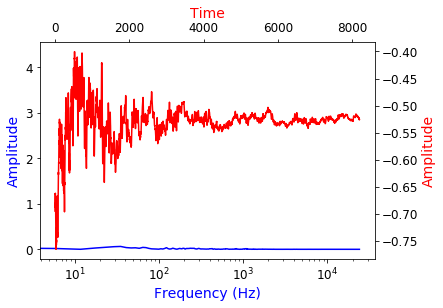

Start: 278528	End: 286720


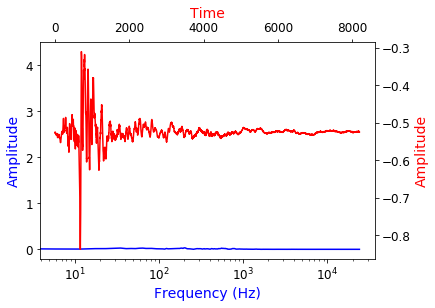

Start: 286720	End: 294912


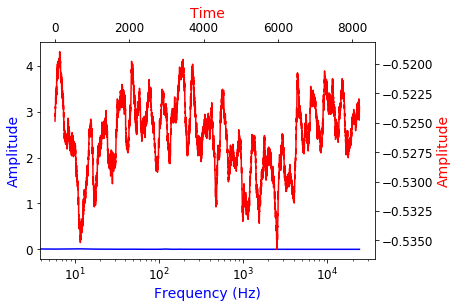

In [6]:
# Following 3 lines just do the math behind the Frequency bin sizes
fftX = np.arange(0, 8192 /2)
bin_reso = (rate / 2) / ( 8192 / 2)

fft_reso = fftX * bin_reso

# Time in the following graphs iwll just be an abstract sense of time
# The actual time in each data point is in the order pf e-05
# Didn't want to bother with that
time = np.arange(0, 8192)

bin_start = 0
bin_end = 8192

while bin_end + 8192 < len(data):
    print("Start: " + str(bin_start) + "\tEnd: " + str(bin_end))
    # Actual math being done
    yFreq = np.fft.fft(data[bin_start:bin_end])
    d = int(len(yFreq) / 2)
    
    # All of the following code is graphing
    fig = plt.figure()
    ax = fig.add_subplot(111, label = "FFT")
    ax2 = fig.add_subplot(111, label = "Audio", frame_on = False) # if frame_on is set to true, the first subplot does not show
    
    ax.plot(fft_reso[:d], abs(yFreq[:d]) / 1e11, color = 'b') # Dividing y values by 1e11 because it adds clutter to graph
    ax.set_xlabel('Frequency (Hz)', color = 'b')
    ax.set_ylabel('Amplitude', color = 'b')
    ax.set_xscale('log')
    
    ax2.plot(time, data[bin_start:bin_end] / 1e8, 'r') # Dividing y values to remove clutter again
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.set_xlabel('Time', color="r") 
    ax2.set_ylabel('Amplitude', color="r")
    ax2.xaxis.set_label_position('top') 
    ax2.yaxis.set_label_position('right')
    
    plt.show()
    
    # Increment the data I will be sampling
    bin_start += 8192
    bin_end += 8192

At this point I want to see what applying a window function to the input data does to the FFT. For this, I will the Hamming window function and numpy provides a function to create a Hamming function.

```python
x = np.hamming(M)
```
This will create a numpy array located at 'x' filled with M values.

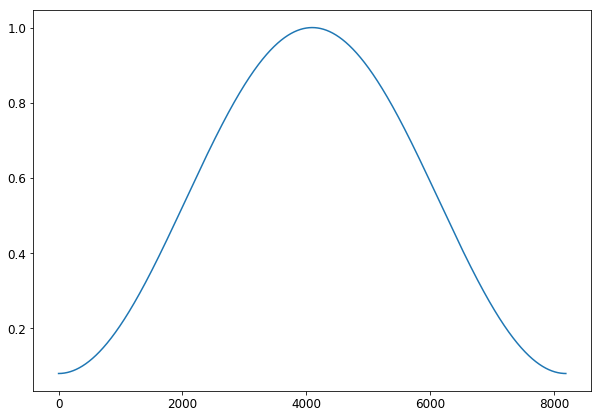

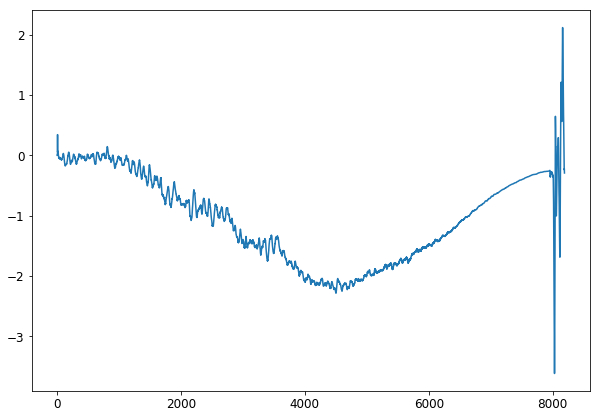

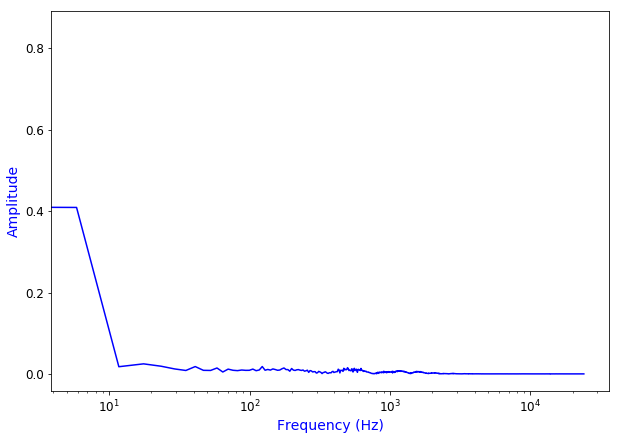

In [7]:
hamming = np.hamming(8192)

plt.figure(figsize = (10, 7))
plt.plot(hamming)
plt.show()

to_be_FFT = data[:8192]*hamming

plt.figure(figsize = (10, 7))
plt.plot(to_be_FFT / 1e7)
plt.show()

y = np.fft.fft(to_be_FFT)
d = int(len(y) / 2)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, label = "FFT")

ax.plot(fft_reso[:d], abs(y[:d]) / 1e11, color = 'b')
ax.set_xlabel('Frequency (Hz)', color = 'b')
ax.set_ylabel('Amplitude', color = 'b')
ax.set_xscale('log')
plt.show()

Unfortunately for the fft that I did above, the main frequencies are offcentred so instead I decided to look for one a place where the main signal components are centered. The place where I found the signal most centered was at start = 24576, end = 32768.

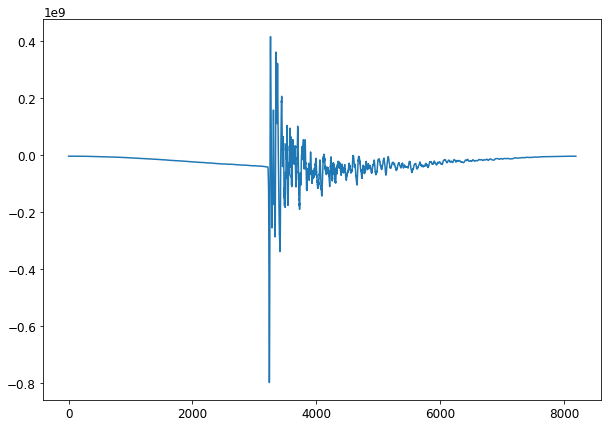

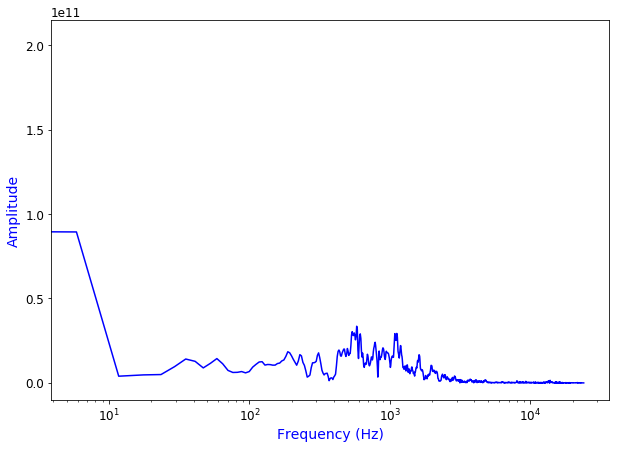

In [8]:
to_be_FFT = data[24576:32768] * hamming

plt.figure(figsize = (10, 7))
plt.plot(to_be_FFT)
plt.show()

y = np.fft.fft(to_be_FFT)
d = int(len(y) / 2)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, label = "FFT")
ax.plot(fft_reso[:d], abs(y[:d]), color = 'b')
ax.set_xlabel('Frequency (Hz)', color = 'b')
ax.set_ylabel('Amplitude', color = 'b')
ax.set_xscale('log')
plt.show()

#### Hanning Window

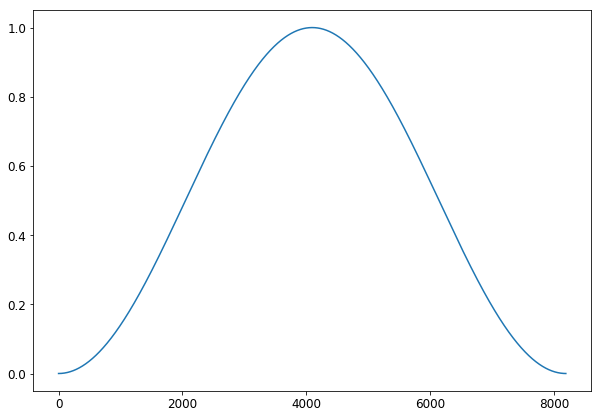

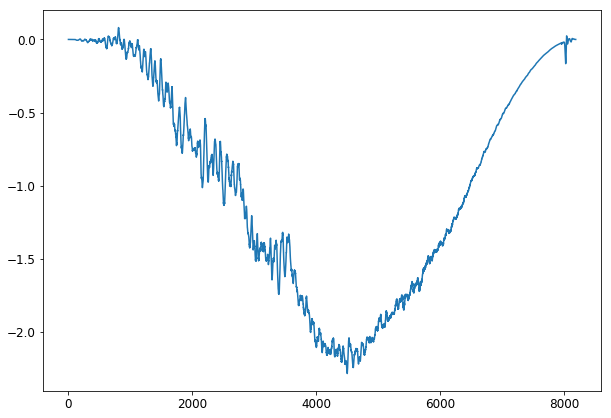

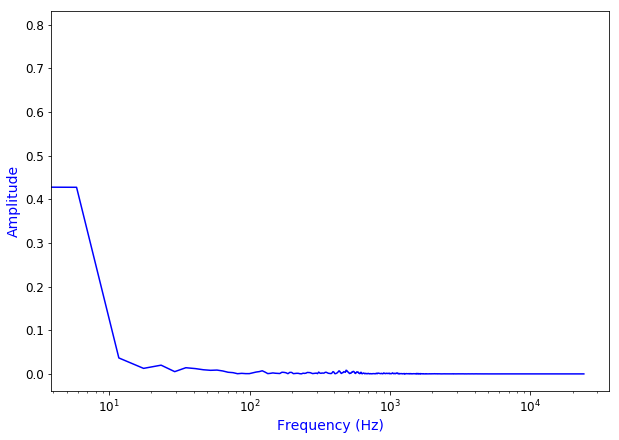

In [9]:
hanning = np.hanning(8192)

plt.figure(figsize = (10, 7))
plt.plot(hanning)
plt.show()

to_be_FFT = data[:8192]*hanning

plt.figure(figsize = (10, 7))
plt.plot(to_be_FFT / 1e7)
plt.show()

y = np.fft.fft(to_be_FFT)
d = int(len(y) / 2)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, label = "FFT")

ax.plot(fft_reso[:d], abs(y[:d]) / 1e11, color = 'b')
ax.set_xlabel('Frequency (Hz)', color = 'b')
ax.set_ylabel('Amplitude', color = 'b')
ax.set_xscale('log')
plt.show()

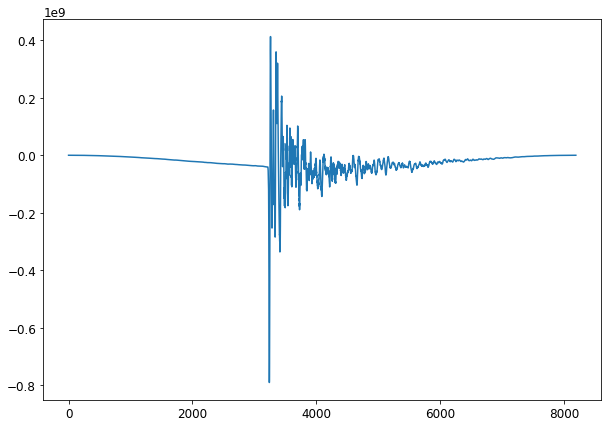

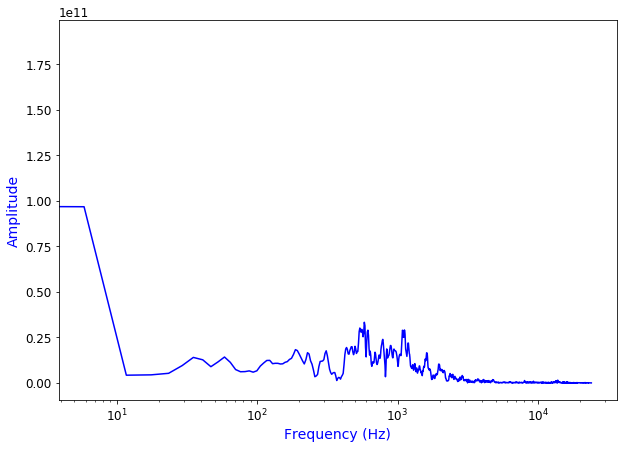

In [10]:
to_be_FFT = data[24576:32768] * hanning

plt.figure(figsize = (10, 7))
plt.plot(to_be_FFT)
plt.show()

y = np.fft.fft(to_be_FFT)
d = int(len(y) / 2)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, label = "FFT")
ax.plot(fft_reso[:d], abs(y[:d]), color = 'b')
ax.set_xlabel('Frequency (Hz)', color = 'b')
ax.set_ylabel('Amplitude', color = 'b')
ax.set_xscale('log')
plt.show()

## Speech Audio Signal

Here I am doing the very same thing I was doing above but on the audio file of my voice. I again check to make sure the sample rate and length of the audio file looks to be normal

In [11]:
rate, data = scipy.io.wavfile.read(SPEECH)

print(rate)
print(len(data))
print(len(data)/rate)

48000
366000
7.625


And then a quick graphing of real time data of voice.

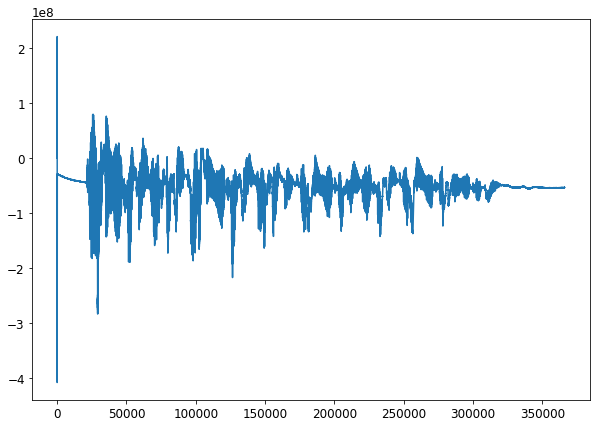

In [12]:
x = np.arange(0, len(data))
y = data

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.show()

Here, I can't quite just apply a fft to the voice file. There is something drowing out th erest of the audio data.

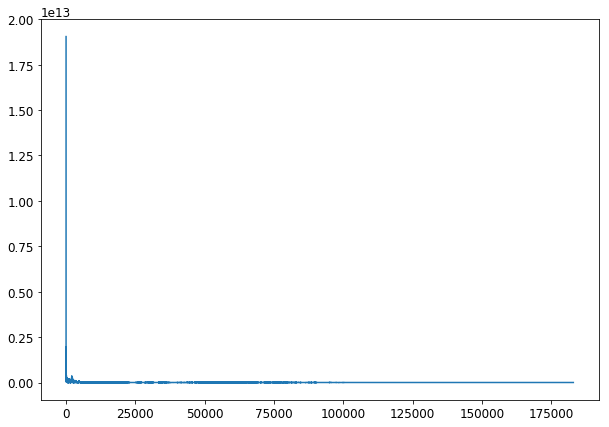

In [13]:
yFreq = np.fft.fft(data)

d = int(len(yFreq)/2)

plt.figure(figsize=(10,7))
plt.plot(abs(yFreq[:d - 1]))
plt.show()